In [92]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

# Lecture de données à partir de fichier csv.

J'ai utilisé pandas pour lire les données car si la taille de données est grande, numpy et open ne marche pas bien.
Les données sont ainsi enregistrées sous la forme DataFrame.

In [93]:
train_set = pd.read_csv('train.csv')

# Séparation des variables et des étiquettes (labels)

In [94]:
Y = train_set['Cover_Type']
del train_set['Cover_Type']
del train_set['Id']

# Tester différents types de classifieurs et sélection de classifieur

Comparer les classifieurs classiques pour choisir le meilleur, ou les meilleurs à utiliser dans la suite.

     * Arbre de Décision
     * K plus proche voisin
     * SVM
     * Perceptron

Deux modèles d'ensemble sont:

     * Forêt aléatoire
     * Adaboost

In [95]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [96]:
model = rfc(n_estimators= 50,max_depth=20)

In [97]:
model.fit(train_set, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
train_set.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [99]:
from sklearn import cross_validation as cv

scores = cv.cross_val_score(model, train_set, Y, cv=5)

In [100]:
scores

array([ 0.74007937,  0.73478836,  0.76388889,  0.79927249,  0.84027778])

In [101]:
from sklearn.linear_model import Perceptron as pcpt

In [102]:
model_1 = pcpt(fit_intercept=True,n_iter= 20)

scores_1 = cv.cross_val_score(model_1, train_set, Y, cv = 5)

In [103]:
scores_1

array([ 0.3369709 ,  0.39153439,  0.23809524,  0.30191799,  0.28902116])

In [104]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [105]:
model_2 = knn(n_neighbors= 5)
scores_2 = cv.cross_val_score(model_2, train_set, Y, cv = 5)


In [106]:
scores_2

array([ 0.69477513,  0.66104497,  0.65046296,  0.65674603,  0.79199735])

In [107]:
from sklearn.ensemble import AdaBoostClassifier as adb

In [108]:
model_3 = adb(base_estimator=rfc(),n_estimators= 10)
scores_3 = cv.cross_val_score(model_3, train_set, Y, cv = 5)

In [109]:
scores_3

array([ 0.68353175,  0.70998677,  0.73809524,  0.75231481,  0.82936508])

In [110]:
from sklearn import tree 

In [111]:
model_4 = tree.DecisionTreeClassifier()
model_4.max_depth = 50
model_4.fit(train_set,Y)
model_4.score(train_set, Y)

1.0

In [112]:
scores_4 = cv.cross_val_score(model_4, train_set, Y, cv = 5)

In [113]:
scores_4

array([ 0.69378307,  0.69742063,  0.68253968,  0.67857143,  0.77083333])

In [114]:
from sklearn import svm

In [115]:
model_5 = svm.SVC()

In [116]:
scores_5 = cv.cross_val_score(model_5, train_set, Y, cv = 5)

In [117]:
scores_5

array([ 0.14550265,  0.14550265,  0.14417989,  0.1468254 ,  0.14880952])

# L'importance des variables

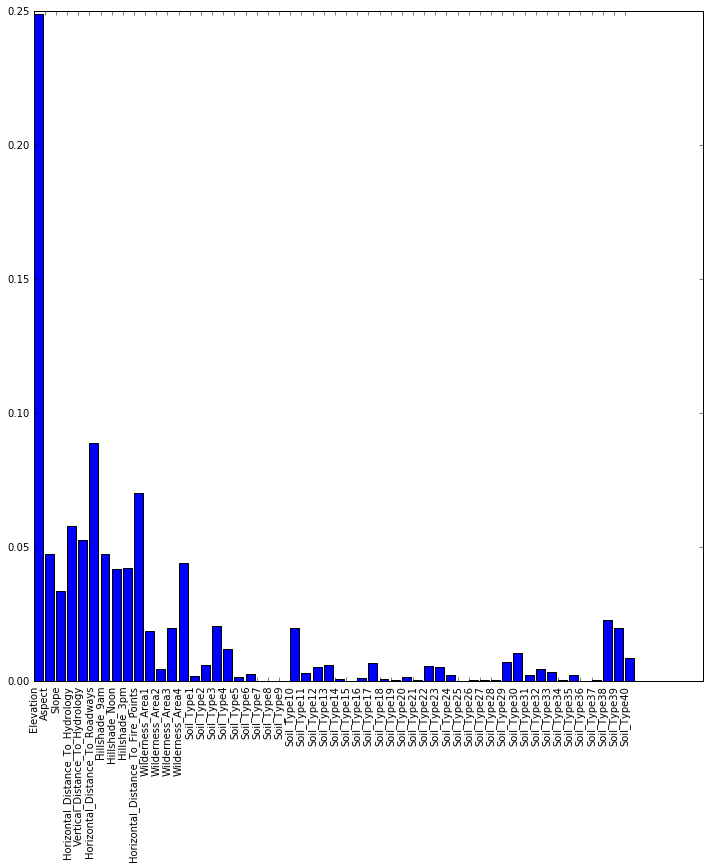

In [118]:
plt.figure(figsize=(12, 12))
importances = model.feature_importances_

plt.bar(left = np.arange(importances.size),height = importances,tick_label = train_set.columns)

plt.setp(plt.xticks()[1],rotation = 90)
plt.show()

In [119]:
np.min(Y), np.max(Y)

(1, 7)

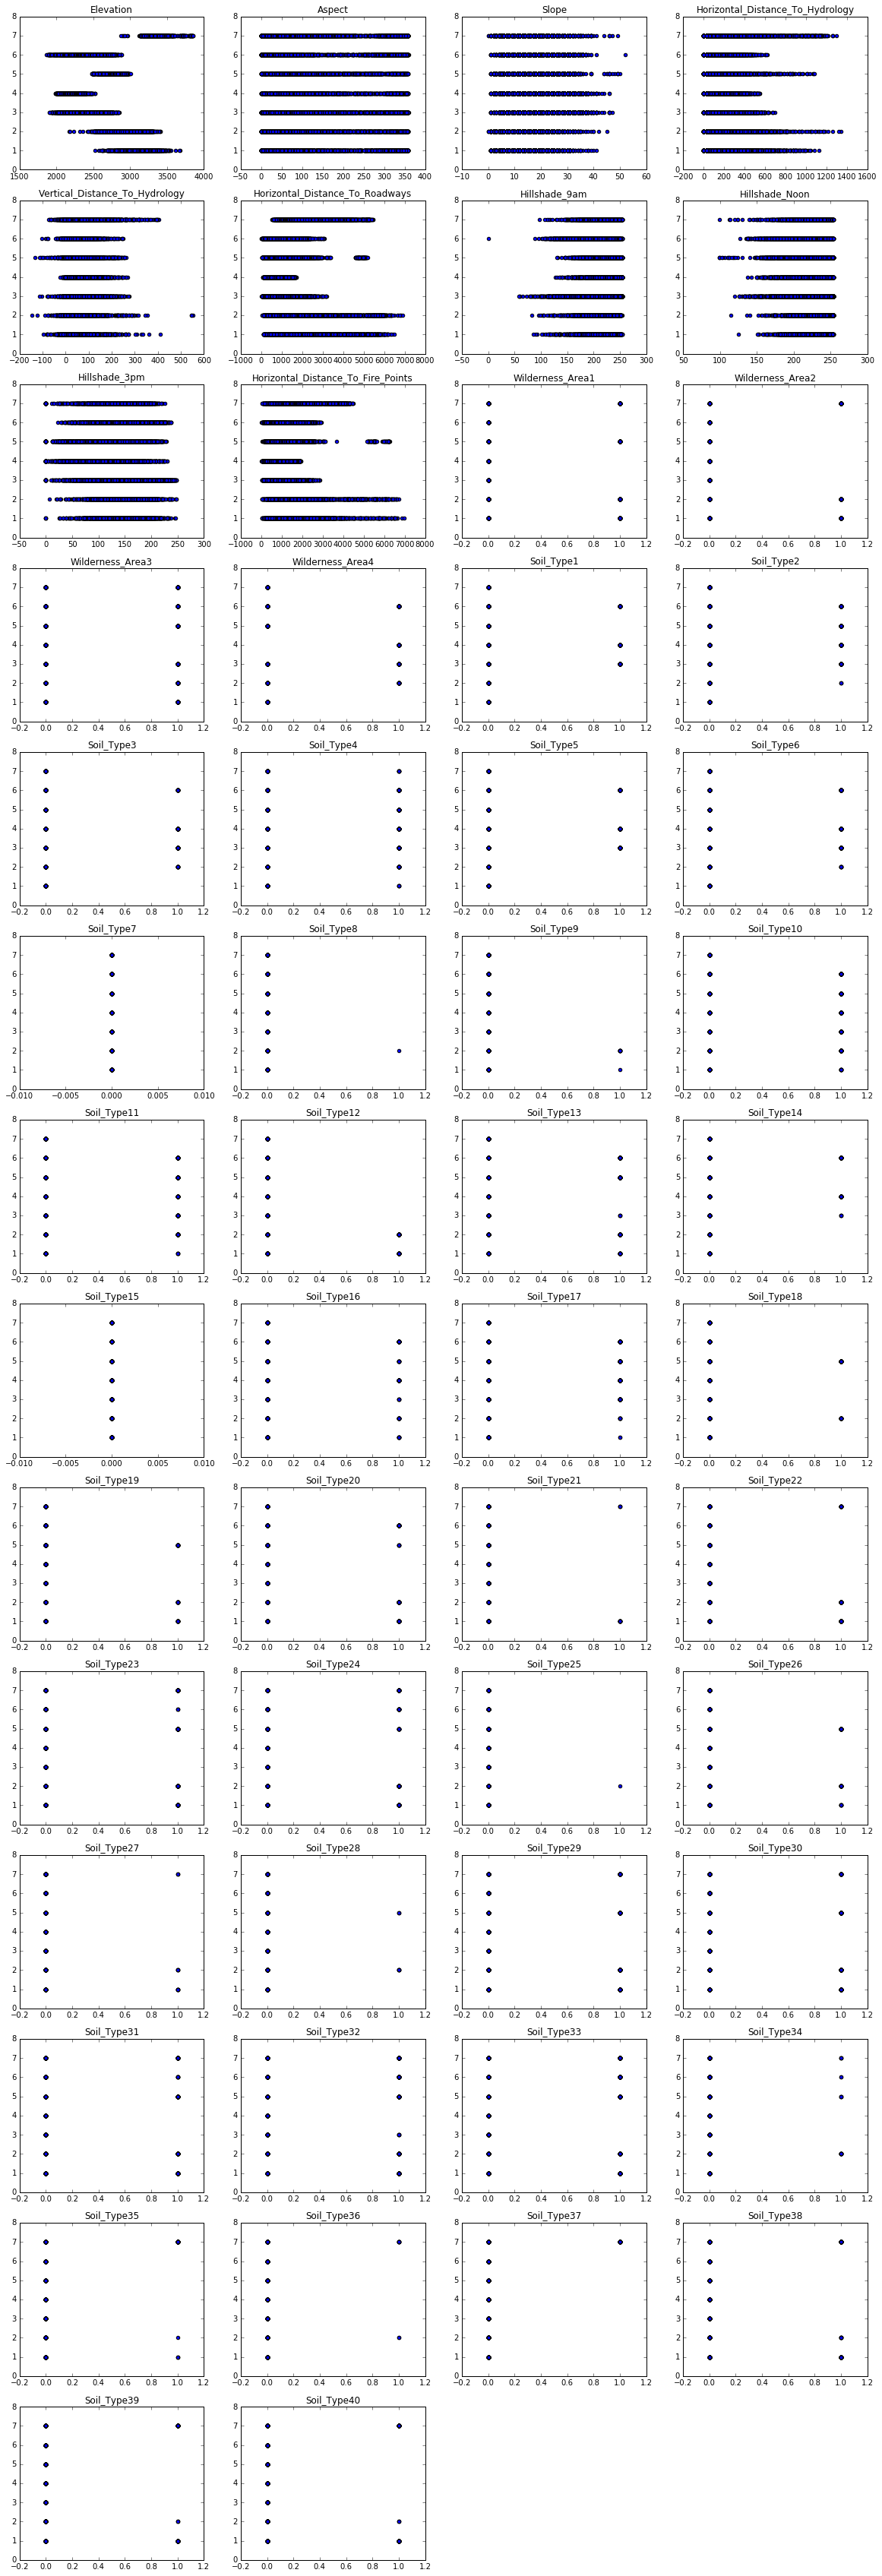

In [120]:
plt.figure(figsize=(20,60))
for i in range(54):
    plt.subplot(14,4,1+i)
    plt.scatter(train_set[train_set.columns[i]],Y)
    plt.title(train_set.columns[i])
    

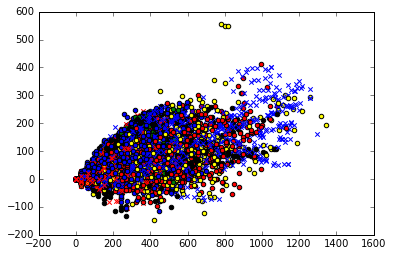

In [121]:
for i in range(Y.size):
    if Y[i] == 1:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'red')
    if Y[i] == 2:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'yellow')
    if Y[i] == 3:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'blue')
    if Y[i] == 4:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'green')
    if Y[i] == 5:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'black')
    if Y[i] == 6:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'red',marker='x')
    if Y[i] == 7:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'blue',marker='x')


In [122]:
test_set = pd.read_csv('test.csv')
Id = test_set['Id']
del test_set['Id']

In [123]:
test1 = adb(base_estimator=rfc(),n_estimators=10)
test1.fit(train_set,Y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [124]:
result1 = test1.predict(test_set)

In [125]:
result1 = pd.DataFrame({'Id':Id,'Cover_Type':result1})
result1 = result1[['Id','Cover_Type']]

In [126]:
result1.to_csv('result1.csv',cols=['Id','Cover_Type'],index=False,header=True)

In [127]:
result1.columns

Index(['Id', 'Cover_Type'], dtype='object')

# Selection des variables

- C'est évidant que les données Aspect et Soil_Type 4 7 et 15 sont inutiles.

In [133]:
new_train_set = train_set.drop(['Soil_Type4','Soil_Type7','Soil_Type15'], axis=1)

In [135]:
new_test_set = test_set.drop(['Soil_Type4','Soil_Type7','Soil_Type15'], axis=1)

In [136]:
new_test_set.columns, new_train_set.columns

(Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
        'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type5', 'Soil_Type6',
        'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
        'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
        'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
        'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
        'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
        'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
        'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37',
        'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
       dtype='object'),
 Index([

# Test sur les paramètres du modèle choisi

- On va utiliser Adaboost avec random forest classifieur.
- On va donc faire varier les paramètres : *max_depth*, *n_estimators*.

In [154]:
mean_scores = []
for i in range (6):
    test2 = adb(base_estimator=rfc(),n_estimators=(3+i)*20)
    mean_scores.append(np.mean(cv.cross_val_score(test2,new_train_set,Y,cv=5)))

[0.75376984126984126,
 0.76190476190476186,
 0.75760582010582012,
 0.76269841269841276,
 0.76164021164021167,
 0.7587962962962963]

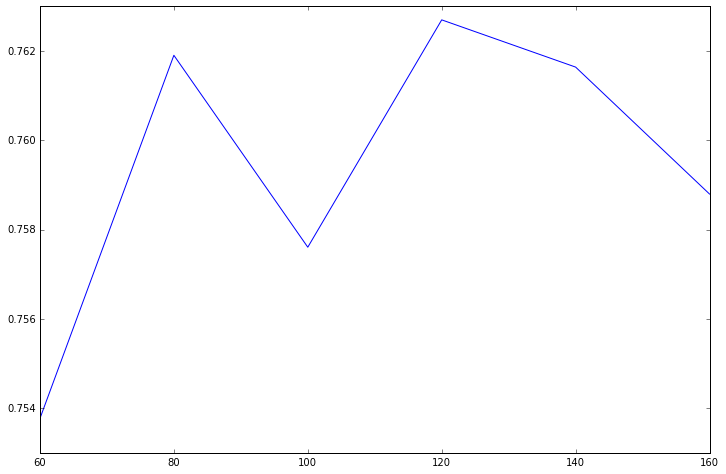

In [155]:
plt.figure(figsize=(12,8))
plt.plot(range(60,180,20),mean_scores)
mean_scores

In [140]:
mean_scores_bis = []
for i in range(5):
    test2 = adb(base_estimator=rfc(max_depth=(1+i)*10),n_estimators=80)
    mean_scores_bis.append(np.mean(cv.cross_val_score(test2,new_train_set,Y,cv=5)))


[0.67083333333333328,
 0.75529100529100535,
 0.75813492063492061,
 0.75806878306878311,
 0.75469576719576725]

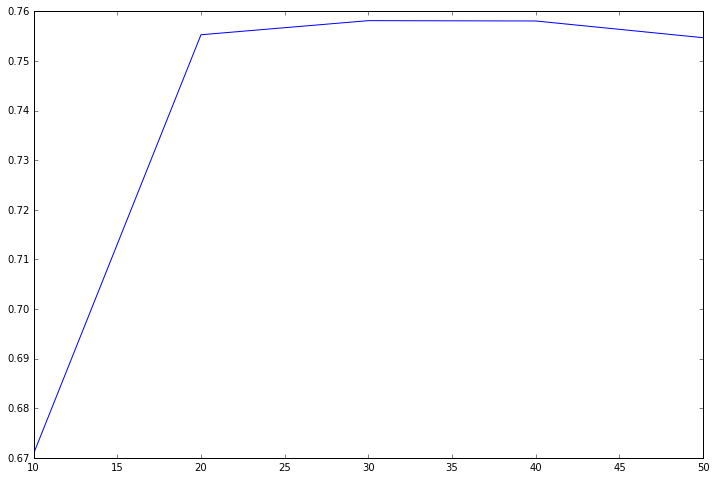

In [141]:
plt.figure(figsize=(12,8))
plt.plot(range(10,60,10),mean_scores_bis)
mean_scores_bis

In [142]:
mean_scores_tri = []
for i in range (8):
    test2 = adb(base_estimator=rfc(max_depth=40,n_estimators=(i+3)*10),n_estimators=80)
    mean_scores_tri.append(np.mean(cv.cross_val_score(test2,new_train_set,Y,cv=3)))


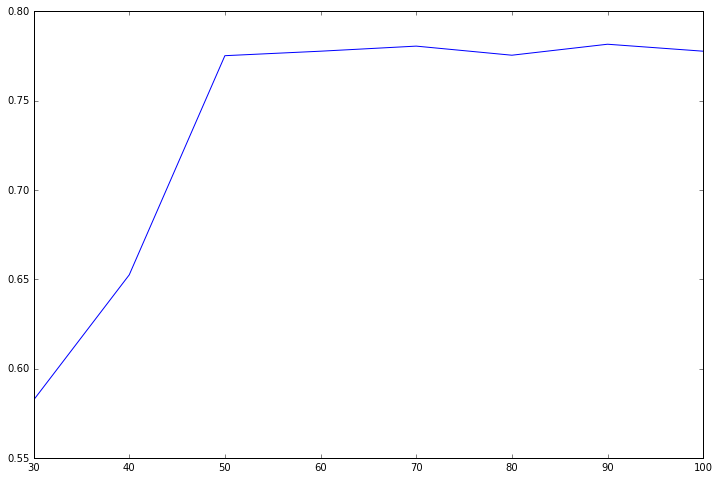

In [143]:
plt.figure(figsize=(12,8))
plt.plot(range(30,110,10),mean_scores_tri)

In [157]:
test2 = adb(base_estimator=rfc(max_depth=40,n_estimators=60),n_estimators=120)

In [158]:
test2.fit(new_train_set,Y)
result2 = test2.predict(new_test_set)

In [159]:
result2 = pd.DataFrame({'Id':Id,'Cover_Type':result2})
result2 = result2[['Id','Cover_Type']]
result2.to_csv('result2.csv',cols=['Id','Cover_Type'],index=False,header=True)


# Analyse de prédiction



In [160]:
predicted = cv.cross_val_predict(test2,new_train_set,Y,cv = 5)

In [161]:
from sklearn import metrics
print(metrics.classification_report(predicted,Y))

             precision    recall  f1-score   support

          1       0.64      0.65      0.64      2137
          2       0.59      0.61      0.60      2101
          3       0.72      0.77      0.74      2013
          4       0.95      0.89      0.92      2291
          5       0.85      0.84      0.85      2190
          6       0.79      0.77      0.78      2231
          7       0.90      0.90      0.90      2157

avg / total       0.78      0.78      0.78     15120



In [162]:
print(metrics.confusion_matrix(predicted,Y))

[[1380  549    2    0    7    3  196]
 [ 526 1280   33    0  203   43   16]
 [   2   47 1549   74   63  278    0]
 [   0    0  149 2043    0   99    0]
 [  49  201   63    0 1846   27    4]
 [  10   63  364   43   41 1710    0]
 [ 193   20    0    0    0    0 1944]]


## Les erreurs principales (par ordre de sévérité):

    1. Distinguer Groupe 1 et Groupe 2
    2. Distinguer Groupe 3 et Groupe 6
    3. Distinguer Groupe 1 et Groupe 7 ou Groupe 2 et Groupe 5

# Classification par couche

On va d'abord classifier dans les sous-ensembles Groupe 1,2,5,7, Groupe 4 et Groupe 3,6


Puis on travaille sur chaque sous-ensemble.

## Classification 1257-4-36

In [246]:
new_columns = new_train_set.columns
Y_proj = []
new_train_set_proj = np.array(new_train_set)
new_train_set_proj_4 = []
new_train_set_proj_8 = []
new_train_set_proj_9 = []
Y_proj_8 = []
Y_proj_9 = []
for i in range(Y.size):
    if Y[i]==4:
        Y_proj.append(4)
        new_train_set_proj_4.append(np.array(new_train_set.iloc[[i]]))
    elif Y[i]==3 or Y[i]==6:
        Y_proj.append(8)
        new_train_set_proj_8.append(np.array(new_train_set.iloc[[i]]))
        Y_proj_8.append(Y[i])
    else:
        Y_proj.append(9)
        new_train_set_proj_9.append(np.array(new_train_set.iloc[[i]]))
        Y_proj_9.append(Y[i])
        

In [247]:
new_train_set_proj_8 = np.array(new_train_set_proj_8)
new_train_set_proj_8 = new_train_set_proj_8[:,0,:]
new_train_set_proj_9 = np.array(new_train_set_proj_9)
new_train_set_proj_9 = new_train_set_proj_9[:,0,:]

In [166]:
model_proj = adb(base_estimator=rfc(max_depth=40,n_estimators=60),n_estimators=120)
model_proj.fit(new_train_set,Y_proj)
cv.cross_val_score(model_proj,new_train_set,Y_proj,cv=5)

array([ 0.94609788,  0.92791005,  0.93584656,  0.95866402,  0.96593915])

In [186]:
predicted_proj = cv.cross_val_predict(model_proj,new_train_set,Y_proj,cv=5)
print(metrics.classification_report(predicted_proj,Y_proj))
print(metrics.confusion_matrix(predicted_proj,Y_proj))

             precision    recall  f1-score   support

          4       0.92      0.91      0.92      2185
          8       0.91      0.91      0.91      4308
          9       0.97      0.98      0.98      8627

avg / total       0.95      0.95      0.95     15120

[[1997  188    0]
 [ 163 3928  217]
 [   0  204 8423]]


In [262]:
model_proj_8 = adb(base_estimator=rfc(max_depth=40,n_estimators=60),n_estimators=120)
model_proj_8.fit(new_train_set_proj_8,Y_proj_8)
cv.cross_val_score(model_proj_8,new_train_set_proj_8,Y_proj_8,cv=5)
predicted_proj_8 = cv.cross_val_predict(model_proj_8,new_train_set_proj_8,Y_proj_8,cv=5)
print(metrics.classification_report(predicted_proj_8,Y_proj_8))
print(metrics.confusion_matrix(predicted_proj_8,Y_proj_8))

             precision    recall  f1-score   support

          3       0.81      0.82      0.81      2125
          6       0.82      0.81      0.82      2195

avg / total       0.81      0.81      0.81      4320

[[1741  384]
 [ 419 1776]]


In [253]:
model_proj_9 = adb(base_estimator=rfc(max_depth=40,n_estimators=60),n_estimators=120)
model_proj_9.fit(new_train_set_proj_9,Y_proj_9)
cv.cross_val_score(model_proj_9,new_train_set_proj_9,Y_proj_9,cv=5)
predicted_proj_9 = cv.cross_val_predict(model_proj_9,new_train_set_proj_9,Y_proj_9,cv=5)
print(metrics.classification_report(predicted_proj_9,Y_proj_9))
print(metrics.confusion_matrix(predicted_proj_9,Y_proj_9))

             precision    recall  f1-score   support

          1       0.65      0.61      0.63      2320
          2       0.62      0.63      0.63      2121
          5       0.85      0.88      0.87      2105
          7       0.87      0.90      0.88      2094

avg / total       0.75      0.75      0.75      8640

[[1410  583   69  258]
 [ 515 1343  245   18]
 [  39  218 1846    2]
 [ 196   16    0 1882]]


In [265]:
model_proj.fit(new_train_set,Y_proj)
output_proj = model_proj.predict(new_test_set)
model_proj_8.fit(new_train_set_proj_8,Y_proj_8)
output_8 = model_proj_8.predict(new_test_set)
model_proj_8.fit(new_train_set_proj_9,Y_proj_9)
output_9 = model_proj_9.predict(new_test_set)

In [279]:
output_final = []
for i in range(output_proj.size):
    if output_proj[i]==4:
        output_final.append(4)
    elif output_proj[i] == 8:
        output_final.append(output_8[i])
    else:
        output_final.append(output_9[i])

In [280]:
result3 = pd.DataFrame({'Id':Id,'Cover_Type':output_final})
result3 = result3[['Id','Cover_Type']]
result3.to_csv('result3.csv',cols=['Id','Cover_Type'],index=False,header=True)


In [289]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=10, n_estimators=400, learning_rate=0.1,nthread=4)


In [290]:
xgb_model.fit(new_train_set,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=400, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [291]:
result4 = xgb_model.predict(new_test_set)

In [292]:
result4 = pd.DataFrame({'Id':Id,'Cover_Type':output_final})
result4 = result4[['Id','Cover_Type']]
result4.to_csv('result4.csv',cols=['Id','Cover_Type'],index=False,header=True)


In [293]:
scores_depth = []
for i in range(10):
    xgb_model = xgb.XGBClassifier(max_depth=i+1, n_estimators=400, learning_rate=0.1,nthread=4)
    scores_depth.append(np.mean(cv.cross_val_score(xgb_model,new_train_set,Y,cv=5)))
scores_est = []
for i in range(10):
    xgb_model = xgb.XGBClassifier(max_depth=10, n_estimators=(i+1)*100, learning_rate=0.1,nthread=4)
    scores_est.append(np.mean(cv.cross_val_score(xgb_model,new_train_set,Y,cv=5)))
scores_rate = []
for i in range(10):
    xgb_model = xgb.XGBClassifier(max_depth=10, n_estimators=400, learning_rate=(i+1)*0.05,nthread=4)
    scores_rate.append(np.mean(cv.cross_val_score(xgb_model,new_train_set,Y,cv=5)))

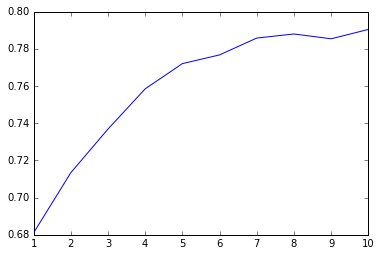

In [295]:
plt.plot(range(1,11),scores_depth)

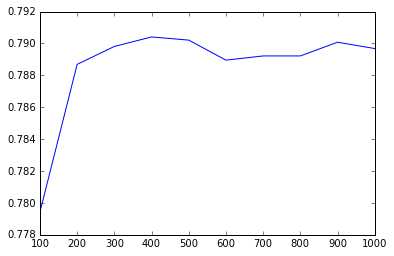

In [296]:
plt.plot(range(100,1100,100),scores_est)

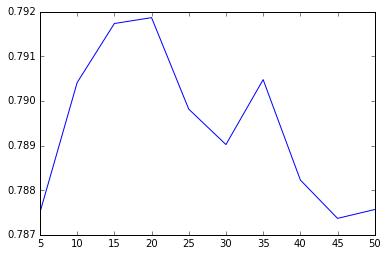

In [301]:
plt.plot(range(5,55,5),scores_rate)

In [303]:
xgb_model = xgb.XGBClassifier(max_depth=12, n_estimators=400, learning_rate=0.2,nthread=4)

cv.cross_val_score(xgb_model,new_train_set,Y,cv=5)


array([ 0.77678571,  0.7662037 ,  0.77380952,  0.78439153,  0.86177249])

In [ ]:
scores_est=[]
for i in range(10):
    xgb_model = xgb.XGBClassifier(max_depth=12, n_estimators=(i+1)*100, learning_rate=0.2,nthread=4)
    scores_est.append(np.mean(cv.cross_val_score(xgb_model,new_train_set,Y,cv=5)))

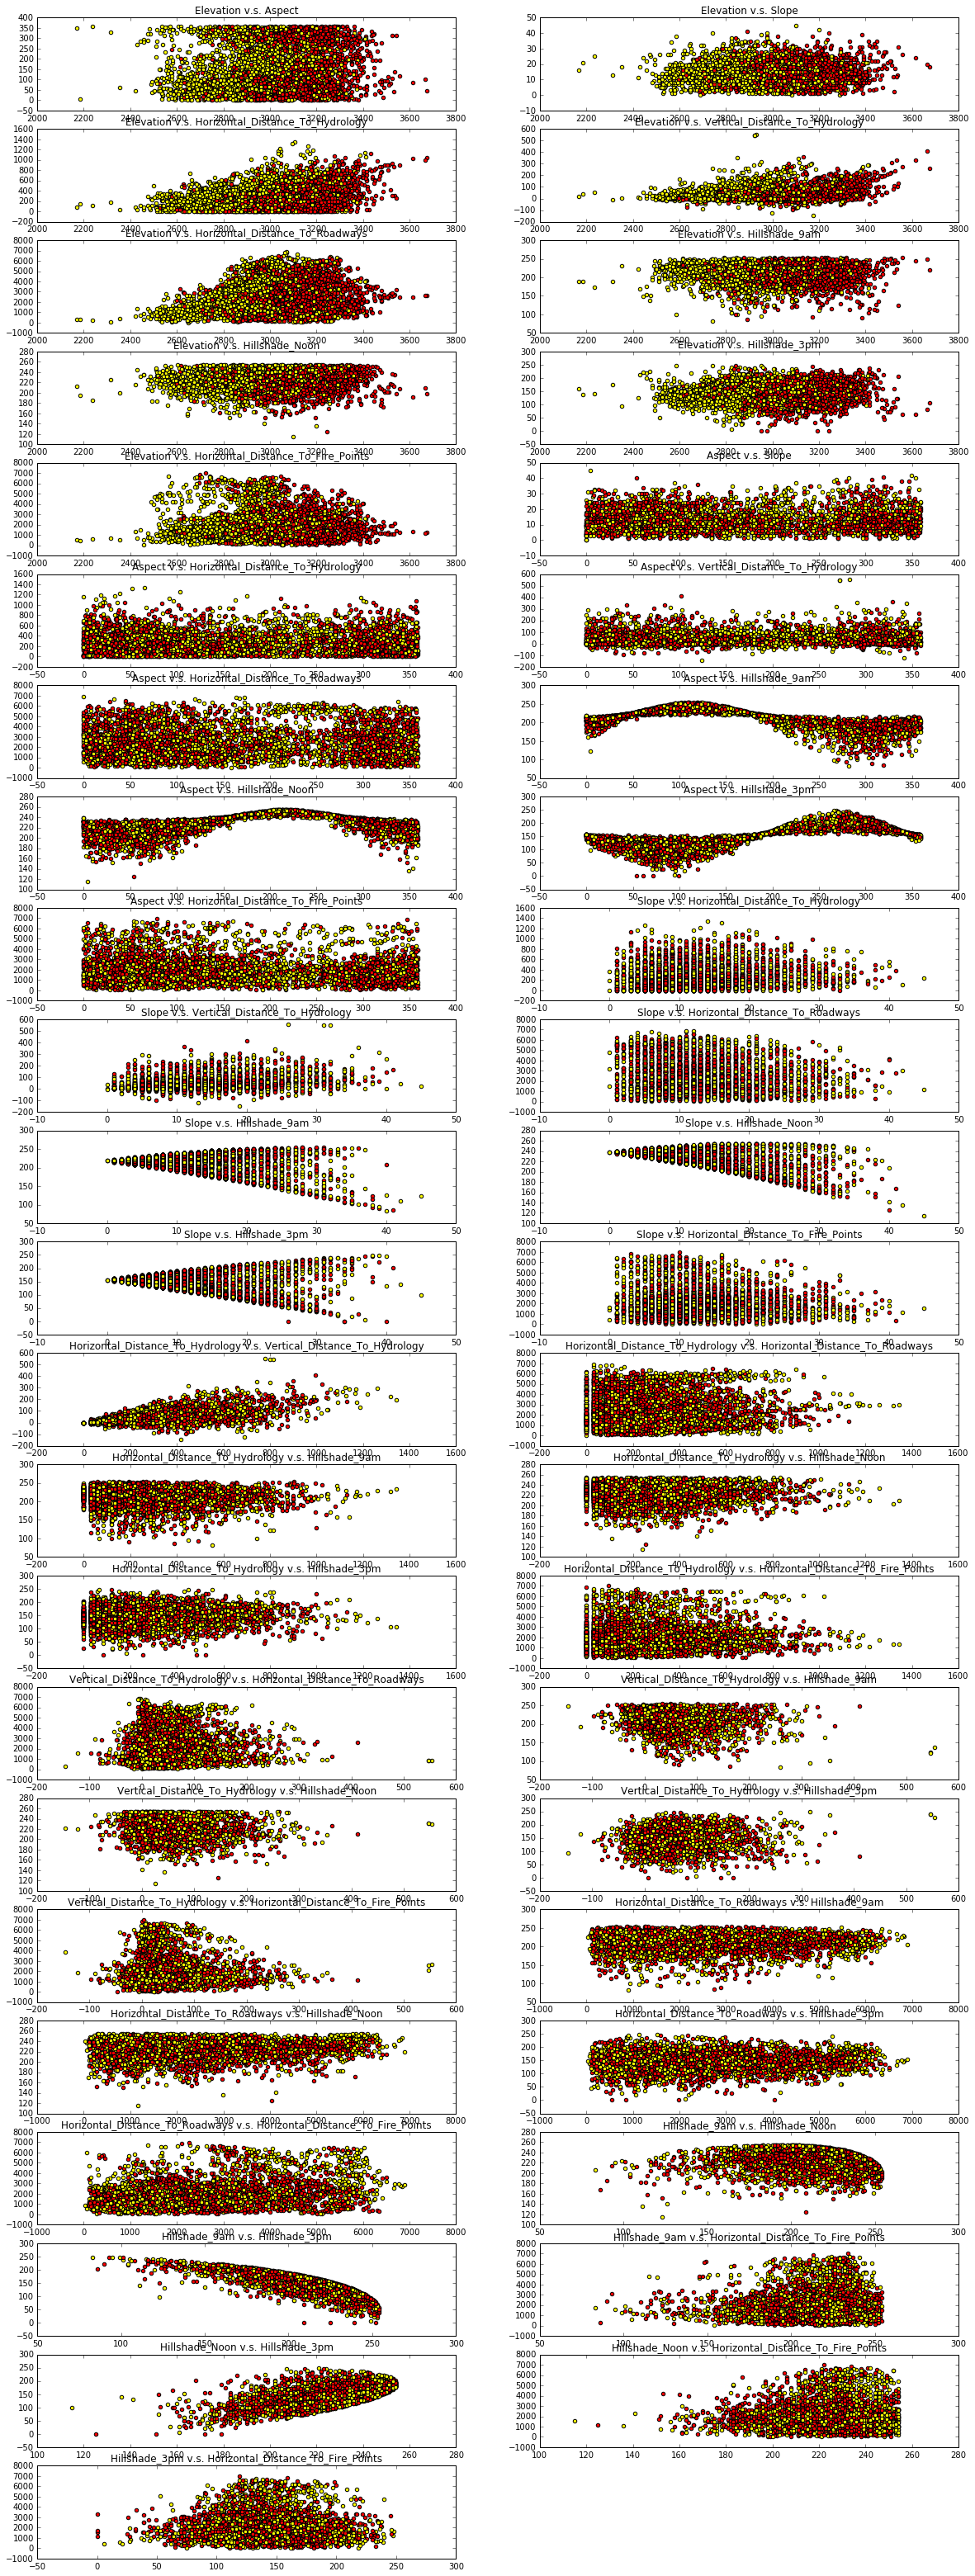

In [182]:
columns = new_train_set.columns
plt.figure(figsize=(20,60))
for k in range(10):
    for j in range(9-k):
        plt.subplot(25,2,k*(19-k)//2+j+1)
        for i in range(Y.size):
            if Y[i] == 1:
                plt.scatter(new_train_set[columns[k]][i],train_set[columns[k+1+j]][i],c = 'red')
            if Y[i] == 2:
                plt.scatter(new_train_set[columns[k]][i],train_set[columns[k+1+j]][i],c = 'yellow')
        plt.title("{} v.s. {}".format(columns[k],columns[k+1+j]))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


KeyError: 5

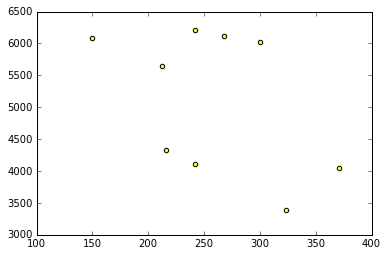

In [163]:
columns = new_train_set.columns
for i in range(Y.size):
    if Y[i] == 1:
        plt.scatter(new_train_set[5][i],train_set[6][i],c = 'red')
    if Y[i] == 2:
        plt.scatter(new_train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Horizontal_Distance_To_Fire_Points'][i],c = 'yellow')
